In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

In [2]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [3]:
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Conexión a BD
# ==============================================================================
import pyodbc

In [6]:
# Configuración de BD y conexión
# ==============================================================================
direccion_servidor = 'LAPTOP-2R1SCPJG\SQLEXPRESS'
nombre_bd = 'BDVirunet'
nombre_usuario = 'sa'
password = '123456'

try:
    conexion = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + 
                              direccion_servidor+';DATABASE='+nombre_bd+';UID='+nombre_usuario+';PWD=' + password)
    print("Conexión exitosa")
    
except Exception as e:
    print("Ocurrió un error al conectar a SQL Server: ", e)

Conexión exitosa


# Recolección de datos

## Plagas

In [7]:
dFechaInicio = '2019-01-01'
dFechaFin = '2019-12-31'

In [8]:
try:
    with conexion.cursor() as cursor:
            consulta = "exec STP_OBTENER_TOTALIZADO_PLAGAS ?,?,?,?"
            cursor.execute(consulta, (dFechaInicio, dFechaFin, 2,1))

            rows = cursor.fetchall()
            
            cols = []
            
            for i,_ in enumerate(cursor.description):
                cols.append(cursor.description[i][0])

            pd.DataFrame(np.array(rows), columns = cols)
            
            df = pd.DataFrame(columns =['Evaluador','Fecha','Fundo','Filtrado','Turno','Lote','Grupo_Plaga','Plaga','Caracteristica','Suma','Grado','Promedio','Porcentaje'] )
            for i in range(len(rows)):
                df.loc[i] = list(rows[i])
except Exception as e: 
    print(e)

## Clima

In [9]:
data_weather = pd.ExcelFile('D:/bibliografia de tesis/Datos/Datos Climaticos Viru Palto.xlsx')
df_weather = data_weather.parse('TABLA')  
data_weather.close()

In [10]:
df_weather = df_weather[df_weather['Año'] == 2019]

In [11]:
df_weather.reset_index(drop = True, inplace = True)

In [16]:
df_weather.head()

,Fecha,ET,T_MIN,T_MAX,RS_PROM,HM_PROM,TMP_PROM
0,2019-01-01,4.0,19.0,26.4,242.9,85.0,22.540000
1,2019-01-02,4.2,19.1,26.8,256.5,86.0,22.530000
2,2019-01-03,3.2,20.4,27.4,187.1,86.0,22.870000
3,2019-01-04,4.3,18.6,28.2,257.4,84.0,23.264583
4,2019-01-05,3.6,20.8,27.4,211.0,83.0,23.479167


In [12]:
df_weather = df_weather[['Fecha','ET(mm).','Tº MIN/DIA (°C)','Tº MAX/DIA (°C)','Rad. Solar Prom.','HUMEDAD PROM.', 'T° Prom/Día (°C)']]
df_weather = df_weather.rename(columns = {'ET(mm).' : 'ET', 
                                      'Tº MIN/DIA (°C)' : 'T_MIN',
                                     'Tº MAX/DIA (°C)': 'T_MAX',
                                     'Rad. Solar Prom.' : 'RS_PROM',
                                     'HUMEDAD PROM.': 'HM_PROM',
                                      'T° Prom/Día (°C)': 'TMP_PROM'})

In [13]:
arrFiltrados = df['Filtrado'].unique()

### Relación entre las variables

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1009
Plaga:  FIORINIA FIORINIAE
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


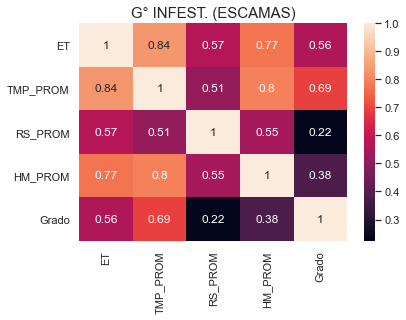

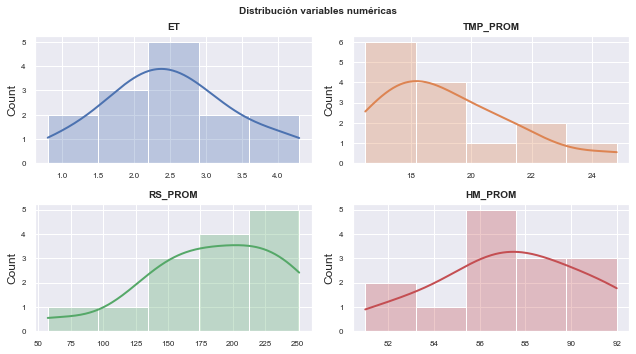

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1015
Plaga:  FIORINIA FIORINIAE
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


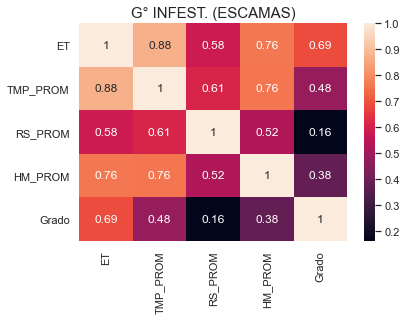

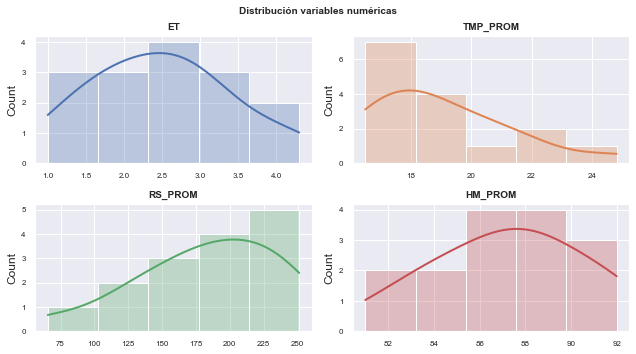

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1160
Plaga:  PINNASPIS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


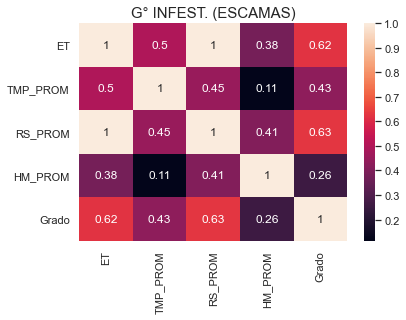

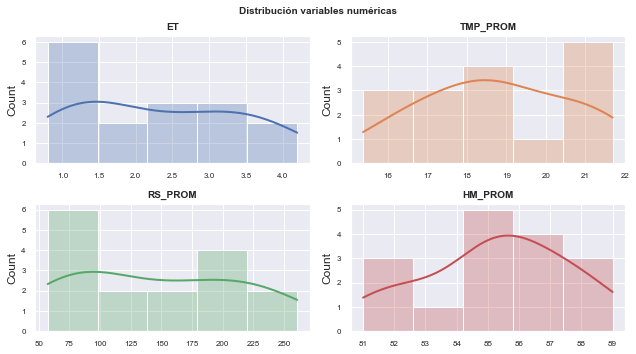

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1157
Plaga:  PINNASPIS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


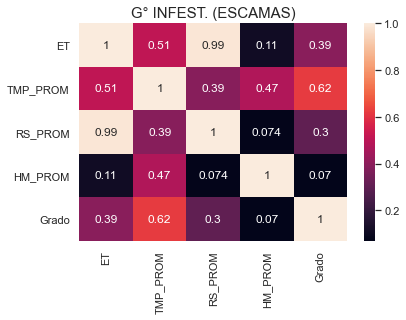

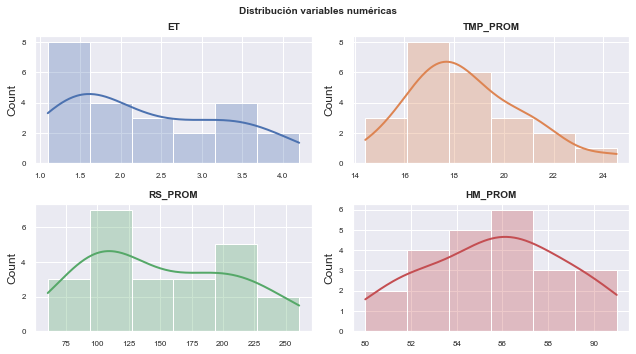

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1140
Plaga:  PINNASPIS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


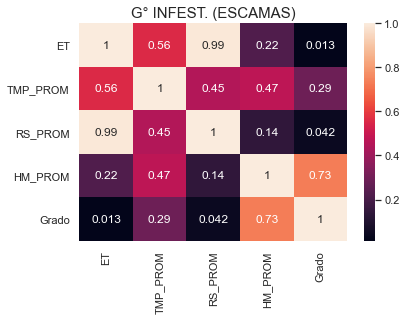

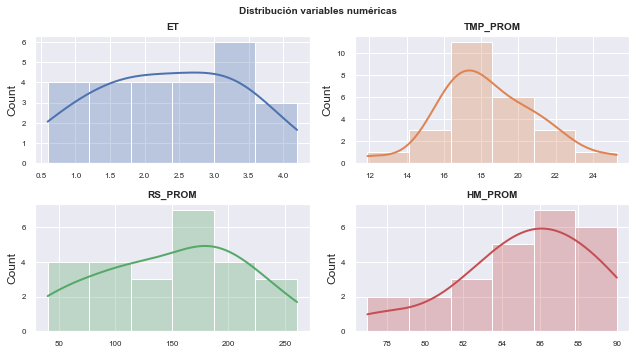

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1144
Plaga:  PINNASPIS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


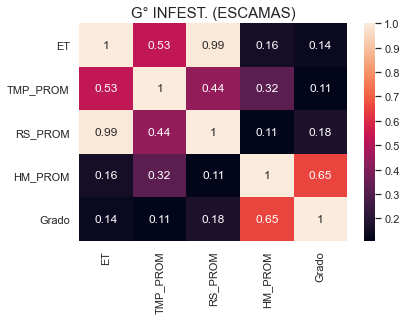

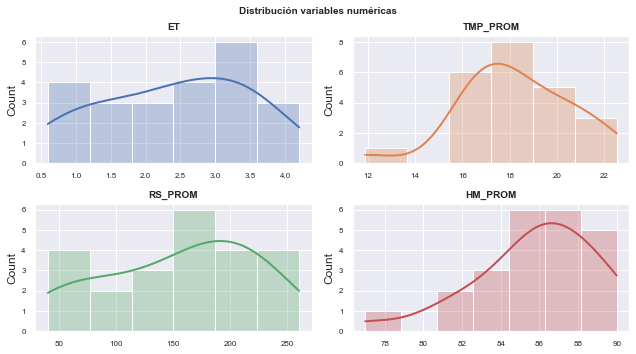

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1138
Plaga:  PINNASPIS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


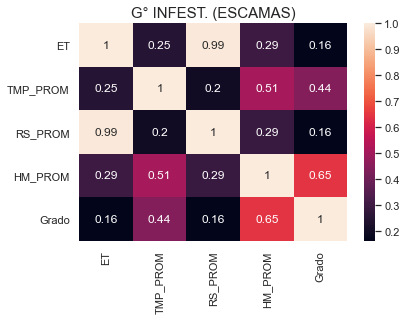

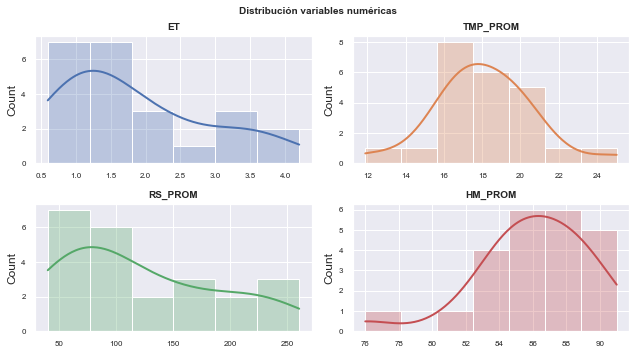

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1304
Plaga:  FIORINIA FIORINIAE
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


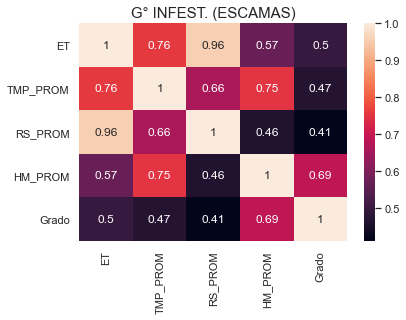

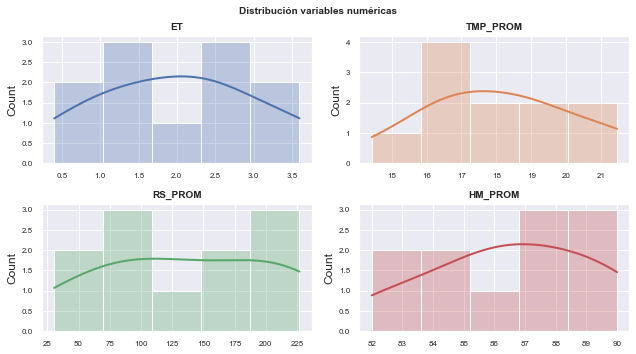

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1307
Plaga:  PINNASPIS SP.
Caracteristica:  G° INFEST. (MIGRANTES)
------------------------------------------------------------


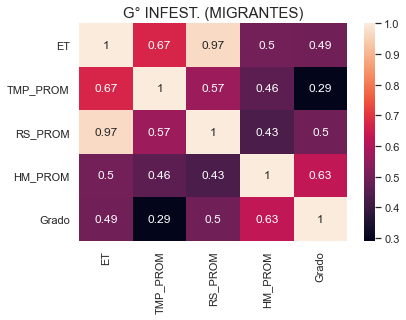

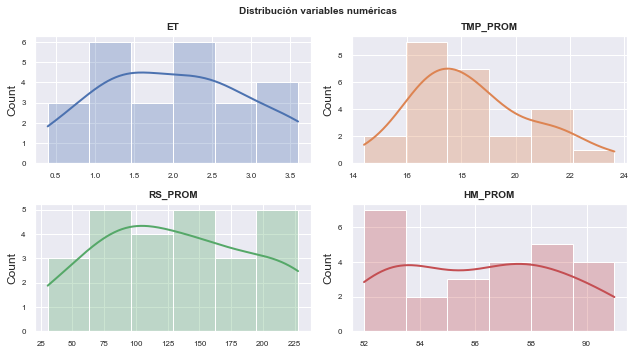

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1712
Plaga:  COCCUS SP.
Caracteristica:  G° INFEST. (MIGRANTES)
------------------------------------------------------------


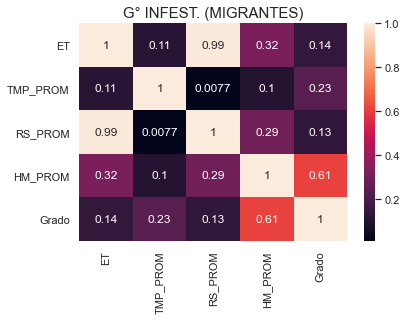

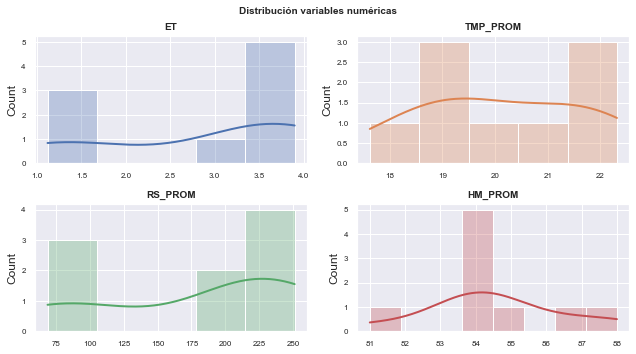

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1702
Plaga:  COCCUS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


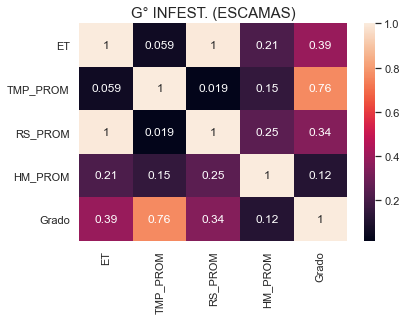

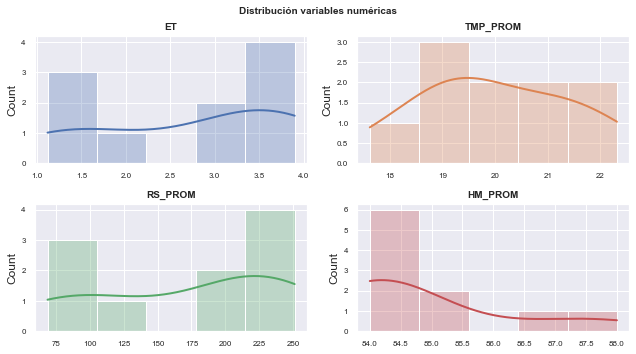

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1704
Plaga:  COCCUS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


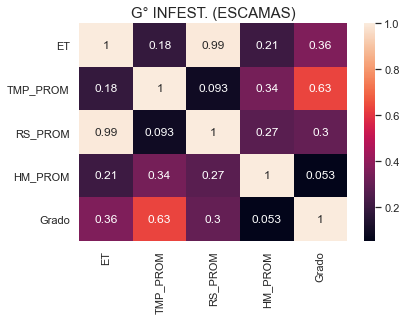

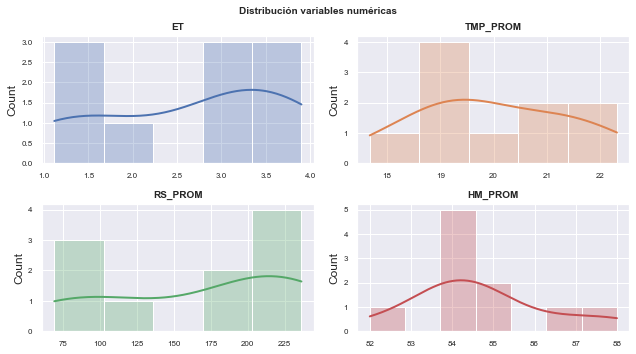

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1724
Plaga:  COCCUS SP.
Caracteristica:  G° INFEST. (MIGRANTES)
------------------------------------------------------------


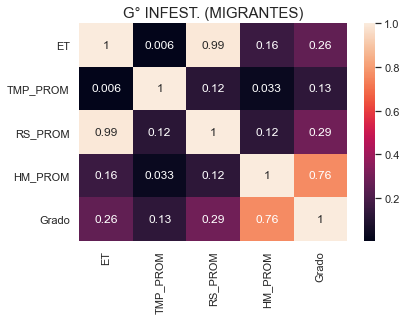

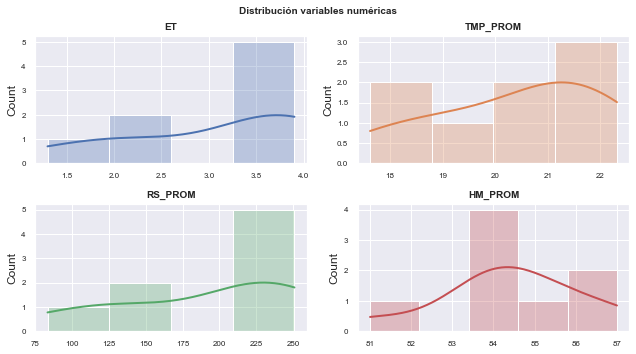

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1710
Plaga:  COCCUS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


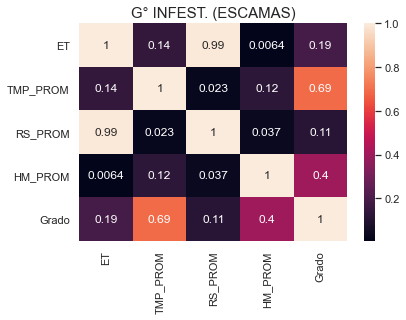

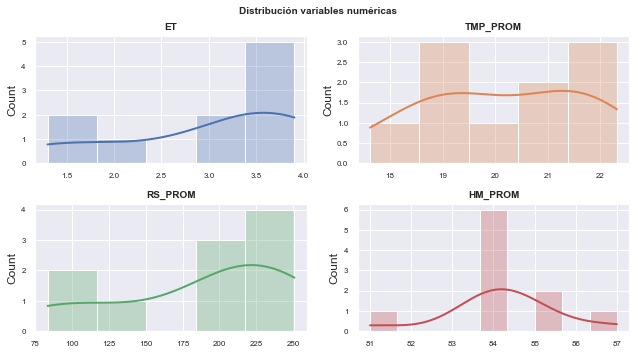

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1714
Plaga:  COCCUS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


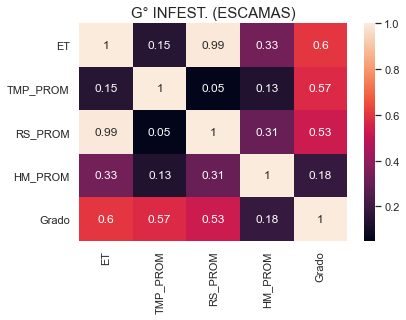

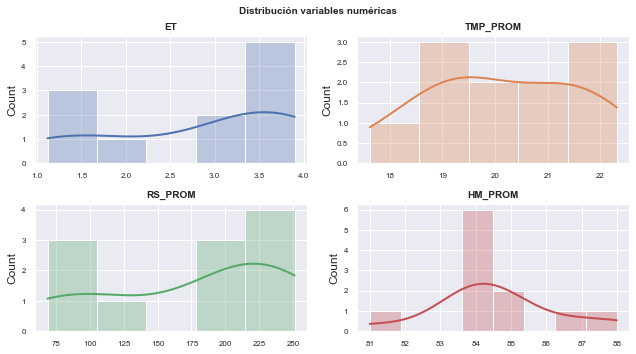

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1711
Plaga:  COCCUS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


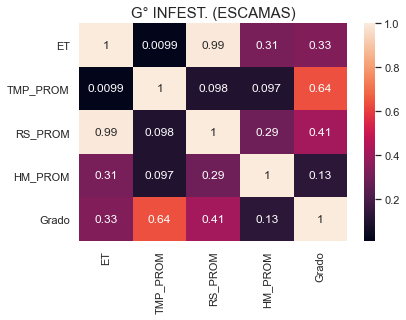

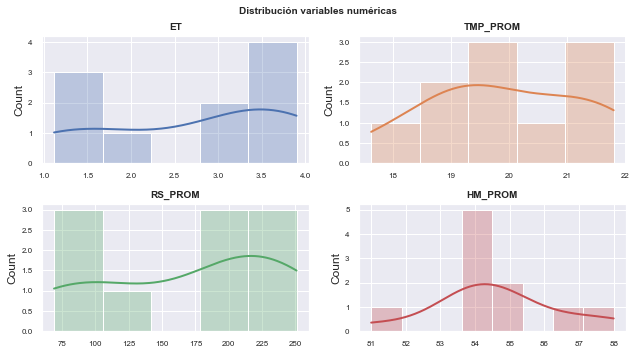

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1709
Plaga:  COCCUS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


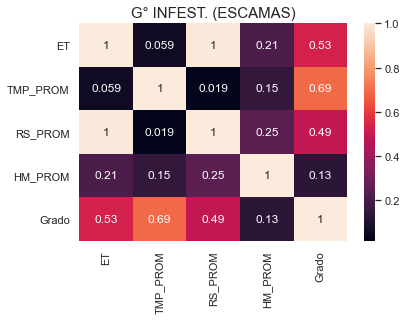

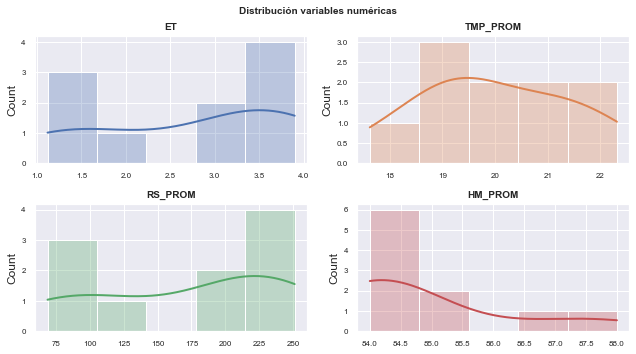

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2922
Plaga:  PINNASPIS SP.
Caracteristica:  G° INFEST. (MIGRANTES)
------------------------------------------------------------


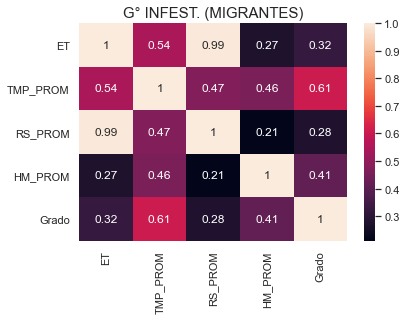

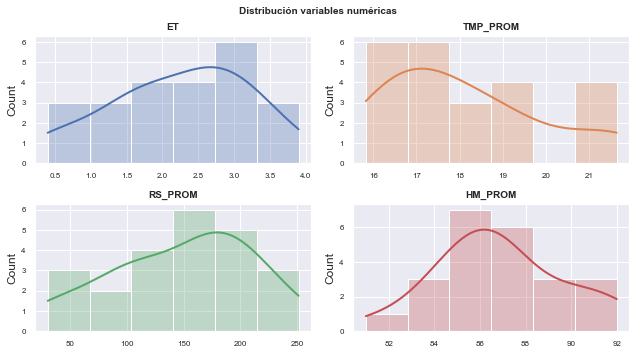

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2923
Plaga:  PINNASPIS SP.
Caracteristica:  G° INFEST. (MIGRANTES)
------------------------------------------------------------


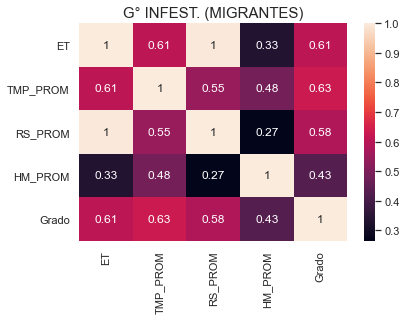

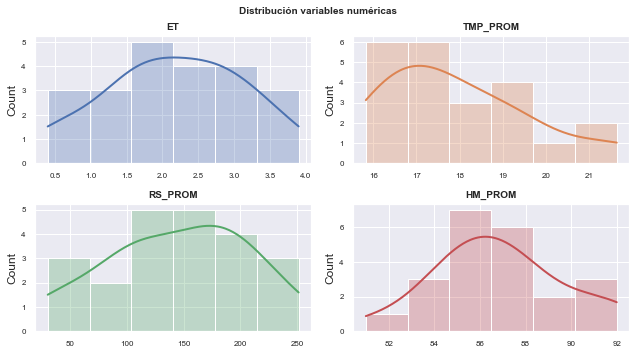

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3014
Plaga:  PINNASPIS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


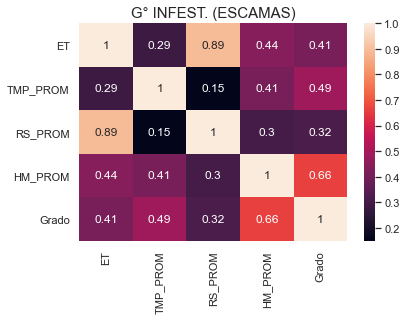

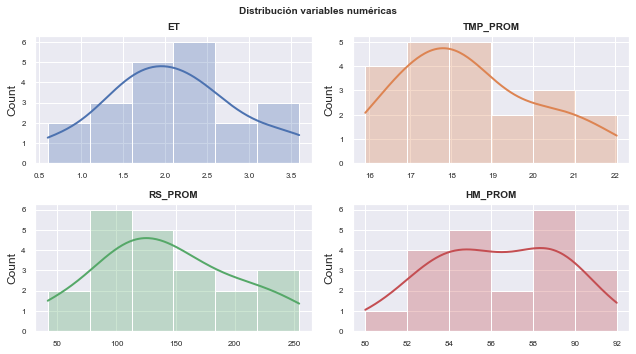

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3022
Plaga:  PINNASPIS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


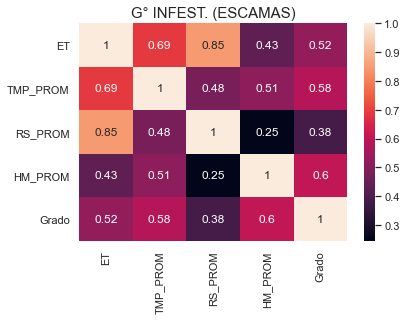

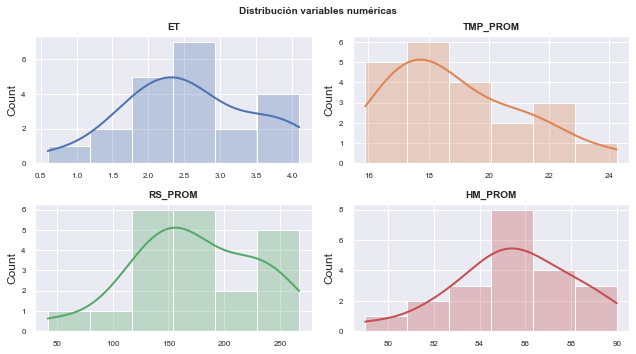

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3016
Plaga:  FIORINIA FIORINIAE
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


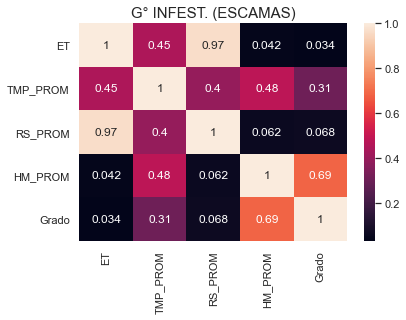

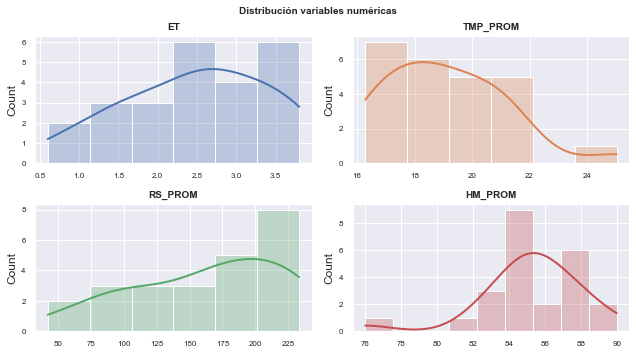

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3001
Plaga:  FIORINIA FIORINIAE
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


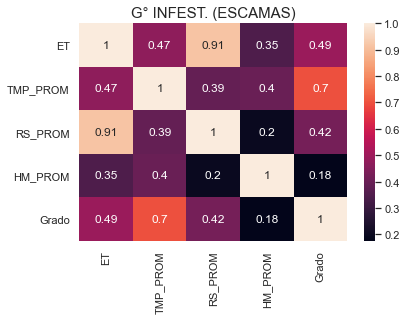

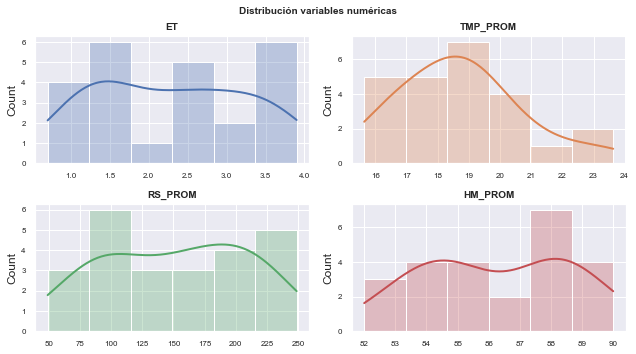

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3019
Plaga:  PINNASPIS SP.
Caracteristica:  G° INFEST. (ESCAMAS)
------------------------------------------------------------


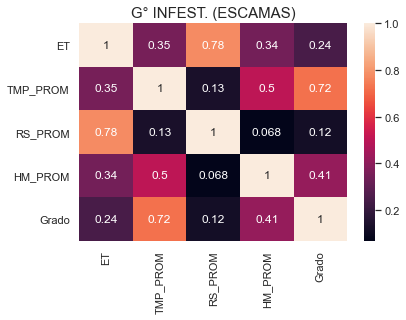

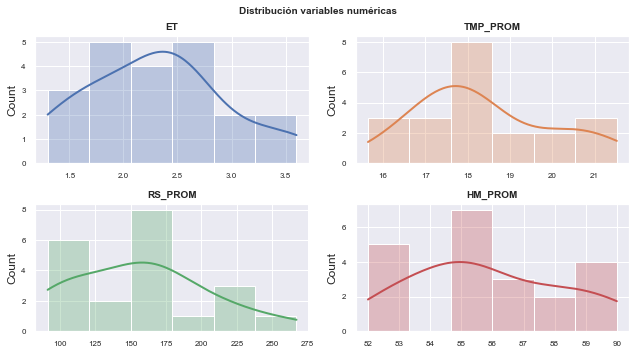

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3012
Plaga:  FIORINIA FIORINIAE
Caracteristica:  G° INFEST. (MIGRANTES)
------------------------------------------------------------


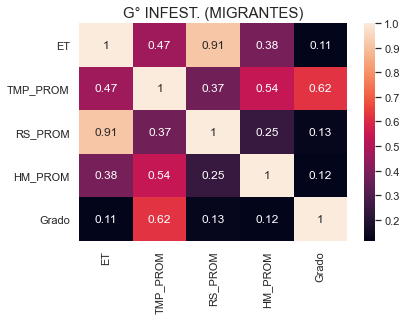

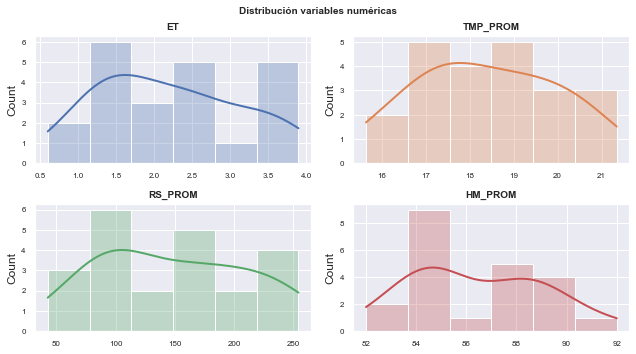

In [21]:
arrPlagas = []
dfFilter = df
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
         
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plaga','Caracteristica'])['Grado'].sum().reset_index()
                    
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(dfCarac['Fecha'])]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)
                 
                    # Filtrar el dataset por las variables que se usarán      
                    df_union = df_union[['Fecha','ET','TMP_PROM','RS_PROM','HM_PROM','Grado']]   
                    
                    df_union[["Grado"]] = df_union[["Grado"]].apply(pd.to_numeric)
                
                    dfCorrelacion = df_union.corr().abs()
                    
                    dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Grado'] > 0.60]

                    if dfCorrelacion_index.shape[0] > 1:   
                        
                        dfCorrexLote = dfCorrexLote.append({'Filtrado': filtrado,'Turno': turno,'Lote' : lote, 'Plaga': plaga,'Caracteristica': caracteristica},ignore_index=True)
                        arrPlagas.append(plaga + ' ' + caracteristica)
                        #Creando Mapa de Calor
                        sns.set()
                        
                        print('------------------------------------------------------------')
                        print('Lugar: Filtrado {} - Turno {} - Lote {}'.format(filtrado,turno, lote))
                        print('Plaga: ', plaga)
                        print('Caracteristica: ', caracteristica)      
                        
                        print('------------------------------------------------------------')
                        
                        ax = sns.heatmap(dfCorrelacion, annot = True)
                        iContador = iContador + 1
                        plt.title('{}'.format(caracteristica), fontdict = { 'fontsize' : '15'})
                        #plt.show()
                        
                        # Gráfico de distribución para cada variable numérica
                        # ==============================================================================
                        # Ajustar número de subplots en función del número de columnas

                        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
                        axes = axes.flat
                        columnas_numeric = df_union[['ET','TMP_PROM','RS_PROM','HM_PROM','Grado']].select_dtypes(include=['float64', 'int']).columns

                        for i, colum in enumerate(columnas_numeric):
                            sns.histplot(
                                data    = df_union[['ET','TMP_PROM','RS_PROM','HM_PROM','Grado']],
                                x       = colum,
                                stat    = "count",
                                kde     = True,
                                color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                                line_kws= {'linewidth': 2},
                                alpha   = 0.3,
                                ax      = axes[i]
                            )
                            axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
                            axes[i].tick_params(labelsize = 8)
                            axes[i].set_xlabel("")



                        fig.tight_layout()
                        plt.subplots_adjust(top = 0.9)
                        fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

                        plt.show()
                        

In [26]:
arrPlagas = np.array(arrPlagas)

In [27]:
pd.unique(arrPlagas)

array(['FIORINIA FIORINIAE G° INFEST. (ESCAMAS)',
       'PINNASPIS SP. G° INFEST. (ESCAMAS)',
       'PINNASPIS SP. G° INFEST. (MIGRANTES)',
       'COCCUS SP. G° INFEST. (MIGRANTES)',
       'COCCUS SP. G° INFEST. (ESCAMAS)',
       'FIORINIA FIORINIAE G° INFEST. (MIGRANTES)'], dtype='<U41')